# Lab on sourcing Data


#### This is going to be an independent lab.
#### Every person is reponsible for their own submission and their own codebase.
#### Collaboration is fine, but visualizations should be unique, and specific functions and methods should be your own work.

In [ ]:

# You are going to select an API ENDPOINT.
# Your goal is to make a call to the API.
# You are going to then take the data returned and store it in a Database.
# You are going to take the raw data and make a new table from it that contains the data in a more workable format
# You are going to build out at least 3 helper functions that help you access data from your DB, or transforms your data into a specific format.
# Using your helper functions, create 2 visualizations that from the data you sourced.
# 2 Visualizations minimum.

### Insert your code below for accessing the API endpoint and getting the data.

In [ ]:
import json
import sqlite3
import requests

In [ ]:
payload = {'$limit':25}
r = requests.get('https://data.cityofnewyork.us/resource/ic3t-wcy2.json',params=payload)

In [ ]:
r.json()

[{'adult_estab': 'N',
  'applicant_license__': '094110',
  'applicant_professional_title': 'PE',
  'applicant_s_first_name': 'WALID',
  'applicant_s_last_name': 'ABDULLA',
  'approved': '01/11/2022',
  'assigned': '01/11/2022',
  'bin__': '4273645',
  'block': '12702',
  'borough': 'QUEENS',
  'building_class': 'A1',
  'building_type': '1-2-3 FAMILY',
  'cluster': 'N',
  'community___board': '412',
  'dobrundate': '01/14/2022 00:00:00',
  'doc__': '01',
  'efiling_filed': 'Y',
  'enlargement_sq_footage': '0',
  'existing_dwelling_units': '1',
  'existing_height': '25',
  'existing_occupancy': 'R-3',
  'existing_zoning_sqft': '0',
  'existingno_of_stories': '2',
  'fee_status': 'STANDARD',
  'fully_paid': '01/11/2022',
  'fully_permitted': '01/13/2022',
  'gis_bin': '4273645',
  'gis_census_tract': '376',
  'gis_council_district': '27',
  'gis_latitude': '40.682428',
  'gis_longitude': '-73.759145',
  'gis_nta_name': 'St. Albans',
  'house__': '122-31',
  'initial_cost': '$23598.00',
  

### Insert your code below that stores the raw data that you pulled into a database.


In [ ]:
con = sqlite3.connect('calls.db')

In [ ]:
cur = con.cursor()

In [ ]:
sql_create_raw_json_table = '''CREATE TABLE raw_json(
                                id INTEGER PRIMARY KEY AUTOINCREMENT,
                                raw_text text
                            )'''

In [ ]:
cur.execute(sql_create_raw_json_table)

In [ ]:
con.commit()


In [ ]:
list_of_strings = []
for row in r.json():
    list_of_strings.append(json.dumps(row))
list_of_strings


['{"job__": "440702161", "doc__": "01", "borough": "QUEENS", "house__": "122-31", "street_name": "NELLIS STREET", "block": "12702", "lot": "00020", "bin__": "4273645", "job_type": "A2", "job_status": "R", "job_status_descrp": "PERMIT ISSUED - ENTIRE JOB/WORK", "latest_action_date": "01/13/2022", "building_type": "1-2-3 FAMILY", "community___board": "412", "cluster": "N", "landmarked": "N", "adult_estab": "N", "loft_board": "N", "little_e": "N", "efiling_filed": "Y", "other": "X", "other_description": "SOLAR TAX", "applicant_s_first_name": "WALID", "applicant_s_last_name": "ABDULLA", "applicant_professional_title": "PE", "applicant_license__": "094110", "professional_cert": "Y", "pre__filing_date": "01/11/2022", "paid": "01/11/2022", "fully_paid": "01/11/2022", "assigned": "01/11/2022", "approved": "01/11/2022", "fully_permitted": "01/13/2022", "initial_cost": "$23598.00", "total_est__fee": "$179.40", "fee_status": "STANDARD", "existing_zoning_sqft": "0", "proposed_zoning_sqft": "0", "e

In [ ]:
list_of_tuples = []
for row in list_of_strings:
    list_of_tuples.append((row,))
list_of_tuples

[('{"job__": "440702161", "doc__": "01", "borough": "QUEENS", "house__": "122-31", "street_name": "NELLIS STREET", "block": "12702", "lot": "00020", "bin__": "4273645", "job_type": "A2", "job_status": "R", "job_status_descrp": "PERMIT ISSUED - ENTIRE JOB/WORK", "latest_action_date": "01/13/2022", "building_type": "1-2-3 FAMILY", "community___board": "412", "cluster": "N", "landmarked": "N", "adult_estab": "N", "loft_board": "N", "little_e": "N", "efiling_filed": "Y", "other": "X", "other_description": "SOLAR TAX", "applicant_s_first_name": "WALID", "applicant_s_last_name": "ABDULLA", "applicant_professional_title": "PE", "applicant_license__": "094110", "professional_cert": "Y", "pre__filing_date": "01/11/2022", "paid": "01/11/2022", "fully_paid": "01/11/2022", "assigned": "01/11/2022", "approved": "01/11/2022", "fully_permitted": "01/13/2022", "initial_cost": "$23598.00", "total_est__fee": "$179.40", "fee_status": "STANDARD", "existing_zoning_sqft": "0", "proposed_zoning_sqft": "0", "

In [ ]:
cur.executemany("INSERT INTO raw_json (raw_text) VALUES (?)",list_of_tuples)

In [ ]:
con.commit()

In [ ]:
con.close()

In [ ]:
con = sqlite3.connect('calls.db')
cur = con.cursor()

In [ ]:
cur.execute("select * from raw_json")


In [ ]:
x = cur.fetchall()

In [ ]:
for row in x:
    print(row)

(1, '{"job__": "440702161", "doc__": "01", "borough": "QUEENS", "house__": "122-31", "street_name": "NELLIS STREET", "block": "12702", "lot": "00020", "bin__": "4273645", "job_type": "A2", "job_status": "R", "job_status_descrp": "PERMIT ISSUED - ENTIRE JOB/WORK", "latest_action_date": "01/13/2022", "building_type": "1-2-3 FAMILY", "community___board": "412", "cluster": "N", "landmarked": "N", "adult_estab": "N", "loft_board": "N", "little_e": "N", "efiling_filed": "Y", "other": "X", "other_description": "SOLAR TAX", "applicant_s_first_name": "WALID", "applicant_s_last_name": "ABDULLA", "applicant_professional_title": "PE", "applicant_license__": "094110", "professional_cert": "Y", "pre__filing_date": "01/11/2022", "paid": "01/11/2022", "fully_paid": "01/11/2022", "assigned": "01/11/2022", "approved": "01/11/2022", "fully_permitted": "01/13/2022", "initial_cost": "$23598.00", "total_est__fee": "$179.40", "fee_status": "STANDARD", "existing_zoning_sqft": "0", "proposed_zoning_sqft": "0",

In [ ]:
con.commit()

In [ ]:
con.close()

### Insert your code below that takes the raw data and transforms it into a more useable format.

In [ ]:
def get_raw_data():
    con = sqlite3.connect('calls.db')
    cur = con.cursor()
    list_of_rows = []
    for row in cur.execute('SELECT * from raw_json'):
        list_of_rows.append(row)
    con.close()
    return list_of_rows

In [ ]:
raw_data = get_raw_data()

In [ ]:
raw_data

[(1,
  '{"job__": "440702161", "doc__": "01", "borough": "QUEENS", "house__": "122-31", "street_name": "NELLIS STREET", "block": "12702", "lot": "00020", "bin__": "4273645", "job_type": "A2", "job_status": "R", "job_status_descrp": "PERMIT ISSUED - ENTIRE JOB/WORK", "latest_action_date": "01/13/2022", "building_type": "1-2-3 FAMILY", "community___board": "412", "cluster": "N", "landmarked": "N", "adult_estab": "N", "loft_board": "N", "little_e": "N", "efiling_filed": "Y", "other": "X", "other_description": "SOLAR TAX", "applicant_s_first_name": "WALID", "applicant_s_last_name": "ABDULLA", "applicant_professional_title": "PE", "applicant_license__": "094110", "professional_cert": "Y", "pre__filing_date": "01/11/2022", "paid": "01/11/2022", "fully_paid": "01/11/2022", "assigned": "01/11/2022", "approved": "01/11/2022", "fully_permitted": "01/13/2022", "initial_cost": "$23598.00", "total_est__fee": "$179.40", "fee_status": "STANDARD", "existing_zoning_sqft": "0", "proposed_zoning_sqft": "

In [ ]:
kvs_i_care_about = ['job__','doc__','borough','house__ #','street_name',
                   'block','lot', 'job_type', 'job_status', 'job_status_descrp']

In [ ]:
# takes in list of tuples (from a select statement), and
# it's going to prune the features we don't need.
def data_extractor(list_of_tuples):

    #Create an empty list to store the unpacked dictionaries.
    list_of_relevant_info = []


    #Contains the keys I care about.
    #In future iterations, make this a parameter of the function.
    kvs_i_care_about = ['job__','doc__','borough','house__ #','street_name','block','lot', 'job_type', 'job_status', 'job_status_descrp']


    #Driver code to unpack the tuples.
    #The ID is going to be stored into X, and the Stringified JSON is going to
    #be stored in Y
    for x,y in list_of_tuples:


        #Create a dictionary that is going to hold the pruned K,V pairs.
        temp_dict = {}


        #Unstringifying the JSON, and storing it into a temporary variable
        parsed_json = json.loads(y)


        #Unpacking the JSON, storing keys into K, and the Values
        #Into V
        for k,v in parsed_json.items():

            #If it finds the same key in my other list kvs_i_care about
            #It's going to create the K,V pairing in the temp_dict
            if k in kvs_i_care_about:
                temp_dict[k] = v

            #after it has checked all the K,V pairs, append it to the list
            #and go on to the next row
        list_of_relevant_info.append(temp_dict)

    return list_of_relevant_info

In [ ]:
cleaned_data = data_extractor(get_raw_data())

In [ ]:
cleaned_data

[{'block': '12702',
  'borough': 'QUEENS',
  'doc__': '01',
  'job__': '440702161',
  'job_status': 'R',
  'job_status_descrp': 'PERMIT ISSUED - ENTIRE JOB/WORK',
  'job_type': 'A2',
  'lot': '00020',
  'street_name': 'NELLIS STREET'},
 {'block': '03154',
  'borough': 'BRONX',
  'doc__': '01',
  'job__': '240313932',
  'job_status': 'J',
  'job_status_descrp': 'PLAN EXAM - DISAPPROVED',
  'job_type': 'A2',
  'lot': '00001',
  'street_name': 'EAST FORDHAM ROAD'},
 {'block': '06303',
  'borough': 'STATEN ISLAND',
  'doc__': '01',
  'job__': '520464319',
  'job_status': 'X',
  'job_status_descrp': 'SIGNED OFF',
  'job_type': 'DM',
  'lot': '00061',
  'street_name': 'SINCLAIR AVENUE'},
 {'block': '10780',
  'borough': 'QUEENS',
  'doc__': '01',
  'job__': '440673512',
  'job_status': 'R',
  'job_status_descrp': 'PERMIT ISSUED - ENTIRE JOB/WORK',
  'job_type': 'A2',
  'lot': '00019',
  'street_name': '222 STREET'},
 {'block': '14142',
  'borough': 'QUEENS',
  'doc__': '01',
  'job__': '4407

In [ ]:
sql_create_cleaned_table = '''CREATE TABLE calls(
                    id INTEGER PRIMARY KEY AUTOINCREMENT,
                    block,
                    borough,
                    doc__,
                    job__,
                    job_status,
                    job_status_descrp,
                    job_type,
                    lot,
                    street_name
)
'''

In [ ]:
con = sqlite3.connect('calls.db')
cur = con.cursor()
cur.execute(sql_create_cleaned_table)
con.close()

In [ ]:
def json_extractor(list_of_dicts):
    # initialize a list that's going to hold all of my tuple pairs
    list_of_tuples = []


    #iterate over the list of dictionaries
    for row in list_of_dicts:


        #Create a tuple of all the values within that row
        temp_list = tuple(x for x in row.values())

        #Append the tuple to the list
        list_of_tuples.append(temp_list)

    return list_of_tuples

holder = json_extractor(cleaned_data)


In [ ]:
con = sqlite3.connect('calls.db')
cur = con.cursor()
cur.executemany("INSERT INTO calls (block,borough,doc__,job__,job_status,job_status_descrp, job_type, lot, street_name) VALUES (?,?,?,?,?,?,?,?,?)",holder)
con.commit()
con.close()

### Insert your code below that contains your three helper functions for accessing and working with your database.

In [ ]:
def return_rows_by_borough(borough_name):
    con = sqlite3.connect('calls.db')
    cur = con.cursor()
    dict_to_pass = {'x':borough_name}
    list_of_rows = [x for x in cur.execute('select * from calls where borough=:x',dict_to_pass)]
    con.close()
    if list_of_rows:
        return list_of_rows
    else:
        return 'No Matches Found'

In [ ]:
return_rows_by_borough('DROP TABLES calls')

'No Matches Found'

### Insert your code below that takes the data you sourced, and creates 2 visualizations from that data.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns


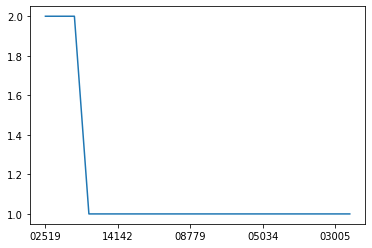

In [ ]:
con = sqlite3.connect('calls.db')
cur = con.cursor()
df = pd.read_sql_query("SELECT * from calls", con)
df['job_status'].sort_values().value_counts().plot()

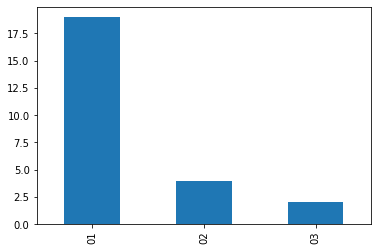

In [ ]:
df['borough'].sort_values().value_counts().plot(kind="bar")